In [74]:
import numpy as np
import pandas as pd
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [75]:
#Import the dataset
df = pd.read_csv("https://raw.githubusercontent.com/PareshC95/Breast_cancer_classification/refs/heads/main/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
#encode the values of diagnosis B and M to 0 and 1
df["diagnosis_enc"] = df["diagnosis"].map({'B': 0, 'M': 1})
df["diagnosis_enc"].value_counts()

diagnosis_enc
0    357
1    212
Name: count, dtype: int64

In [77]:
#Separate the target variable 'diagnosis' and the features
y = df['diagnosis_enc']
X = df.drop(columns=['id','Unnamed: 32'])

# Scatter plot con smoothness_mean

C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\602327924.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\602327924.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)


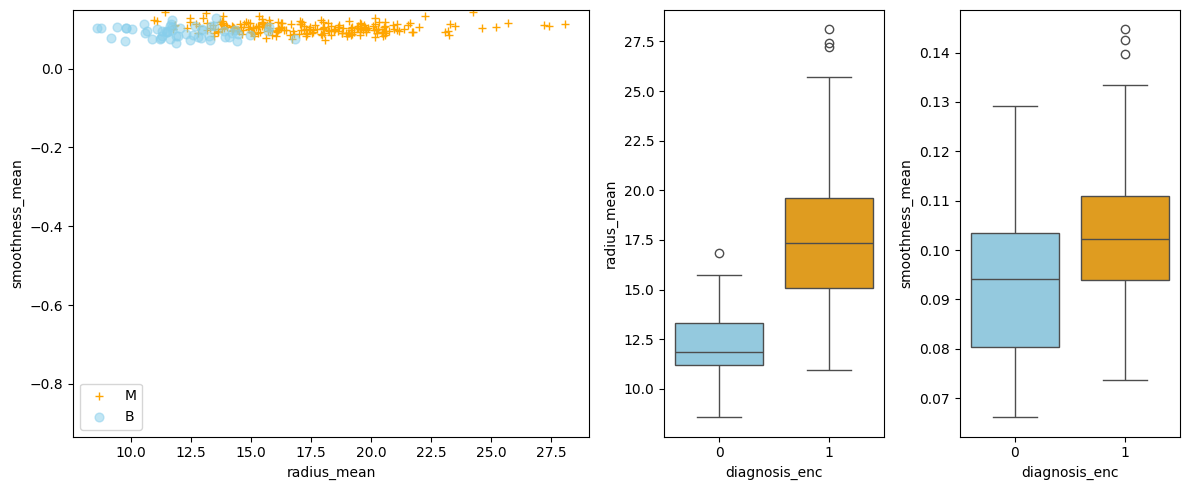

In [78]:
# Use df as your working dataset
df_no = df[df['diagnosis_enc'] == 0].sample(frac=0.15, random_state=42)
df_yes = df[df['diagnosis_enc'] == 1]
df_ = pd.concat([df_no, df_yes])

# Define features to use
x_feature = 'radius_mean'
y_feature = 'smoothness_mean'

# Set up figure and subplots
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, : -2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0, -1])

# Scatter plot
ax1.scatter(x=df_[df_['diagnosis_enc'] == 1][x_feature],
            y=df_[df_['diagnosis_enc'] == 1][y_feature],
            s=40, c='orange', marker='+', linewidths=1, label='M')

ax1.scatter(x=df_[df_['diagnosis_enc'] == 0][x_feature],
            y=df_[df_['diagnosis_enc'] == 0][y_feature],
            alpha=0.5, s=40, c='skyblue', marker='o', label='B')

ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_xlim(left=df_[x_feature].min() - 1)
ax1.set_ylim(bottom=df_[y_feature].min() - 1)
ax1.legend()

# Boxplots
c_palette = {'0': 'skyblue', '1': 'orange'}
sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(fig)
plt.show()

# Scatter plot & box plot on compactness mean

C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\262565932.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\262565932.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)


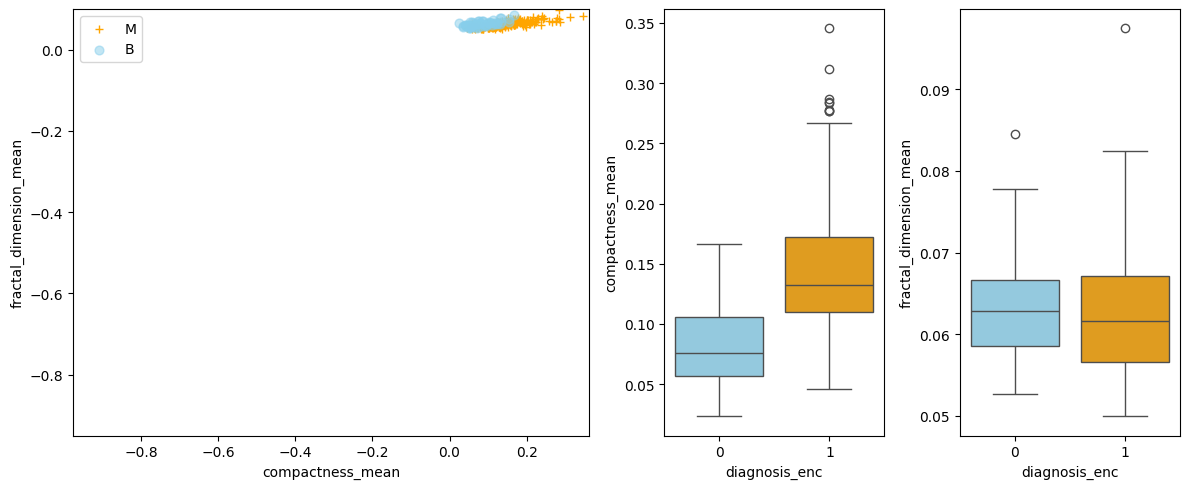

In [79]:
# Use df as your working dataset
df_no = df[df['diagnosis_enc'] == 0].sample(frac=0.15, random_state=42)
df_yes = df[df['diagnosis_enc'] == 1]
df_ = pd.concat([df_no, df_yes])

# Define features to use
x_feature = 'compactness_mean'
y_feature = 'fractal_dimension_mean'

# Set up figure and subplots
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, : -2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0, -1])

# Scatter plot
ax1.scatter(x=df_[df_['diagnosis_enc'] == 1][x_feature],
            y=df_[df_['diagnosis_enc'] == 1][y_feature],
            s=40, c='orange', marker='+', linewidths=1, label='M')

ax1.scatter(x=df_[df_['diagnosis_enc'] == 0][x_feature],
            y=df_[df_['diagnosis_enc'] == 0][y_feature],
            alpha=0.5, s=40, c='skyblue', marker='o', label='B')

ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_xlim(left=df_[x_feature].min() - 1)
ax1.set_ylim(bottom=df_[y_feature].min() - 1)
ax1.legend()

# Boxplots
c_palette = {'0': 'skyblue', '1': 'orange'}
sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(fig)
plt.show()

# SCATTER PLOT & BOX PLOT radius_mean and concavity_mean

C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\1289739074.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\1289739074.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)


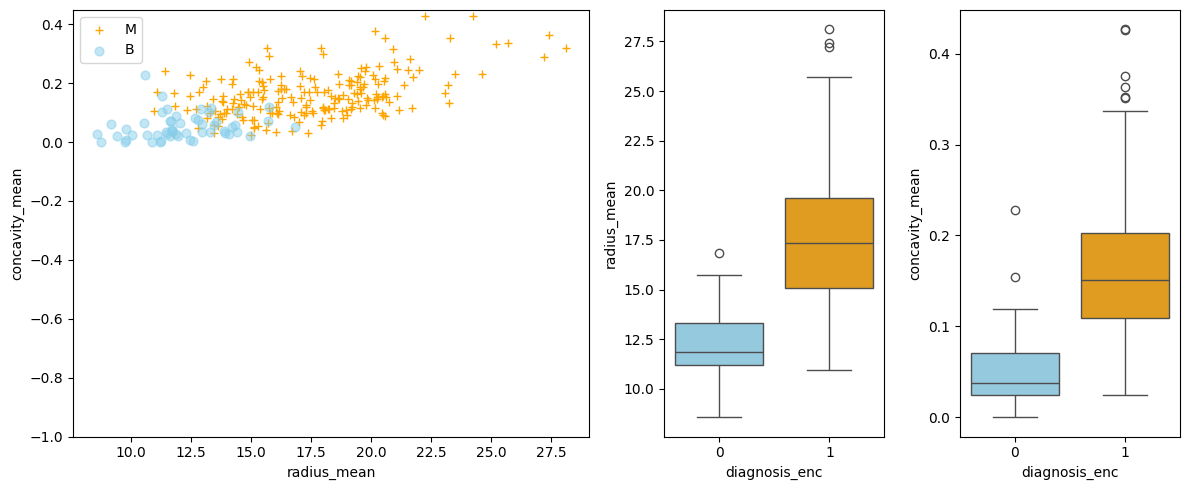

In [80]:
# Use df as your working dataset
df_no = df[df['diagnosis_enc'] == 0].sample(frac=0.15, random_state=42)
df_yes = df[df['diagnosis_enc'] == 1]
df_ = pd.concat([df_no, df_yes])

# Define features to use
x_feature = 'radius_mean'
y_feature = 'concavity_mean'

# Set up figure and subplots
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, :-2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0, -1])

# Scatter plot
ax1.scatter(x=df_[df_['diagnosis_enc'] == 1][x_feature],
            y=df_[df_['diagnosis_enc'] == 1][y_feature],
            s=40, c='orange', marker='+', linewidths=1, label='M')

ax1.scatter(x=df_[df_['diagnosis_enc'] == 0][x_feature],
            y=df_[df_['diagnosis_enc'] == 0][y_feature],
            alpha=0.5, s=40, c='skyblue', marker='o', label='B')

ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_xlim(left=df_[x_feature].min() - 1)
ax1.set_ylim(bottom=df_[y_feature].min() - 1)
ax1.legend()

# Boxplots
c_palette = {'0': 'skyblue', '1': 'orange'}
sns.boxplot(x='diagnosis_enc', y=x_feature, data=df_, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='diagnosis_enc', y=y_feature, data=df_, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(fig)
plt.show()

In [81]:
x = df['radius_mean'].values.reshape(-1,1) # scikit-learn expects a 2D array not a pd.Series :(
y = df['diagnosis_enc']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
print(f'Training set X: {X_train.shape}\nTraining set y: {X_train.shape}\n')
print(f'Test set X: {X_test.shape}\nTest set y: {X_test.shape}')

Training set X: (455, 1)
Training set y: (455, 1)

Test set X: (114, 1)
Test set y: (114, 1)


In [84]:
logistic = skl_lm.LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [85]:
x_proba = logistic.predict_proba([X_train[0]])
x_pred = logistic.predict([X_train[0]])

print('Class Order:', logistic.classes_)
print('Prob:', x_proba)
print('Model prediction:', x_pred)

Class Order: [0 1]
Prob: [[0.22428497 0.77571503]]
Model prediction: [1]


In [86]:
color_blue =  "#1a559e"
color_pink =  "#e71d71"

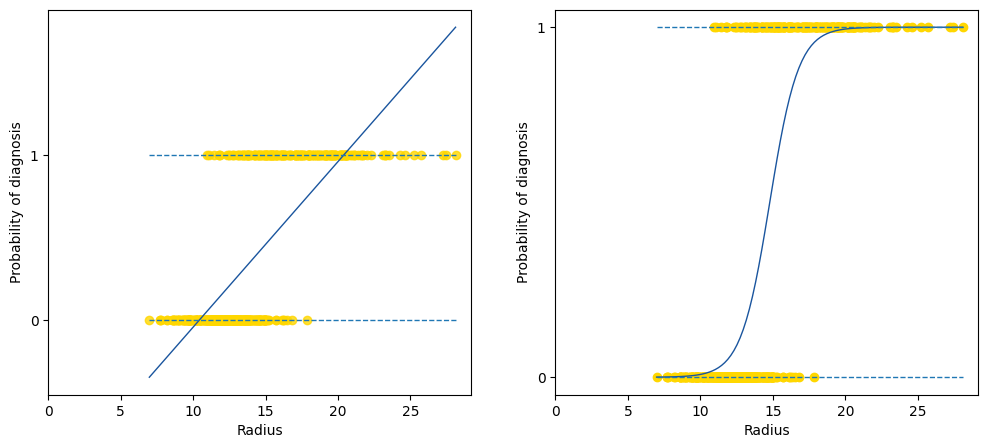

In [87]:
# Compare linear regression and logistic regression
X_space = np.linspace(df.radius_mean.min(), df.radius_mean.max(), 100).reshape(-1, 1)
prob = logistic.predict_proba(X_space)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(x=df.radius_mean, y=df.diagnosis_enc, order=1, ci=None,
            scatter_kws={'color':'gold'},
            line_kws={'color':color_blue, 'lw':1}, ax=ax1)
# Right plot
ax2.scatter(x, y, color='gold')
ax2.plot(X_space, prob[:,1], color=color_blue, lw=1)

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of diagnosis')
    ax.set_xlabel('Radius')
    ax.set_yticks([0, 1])
    ax.set_xlim(xmin=0)

In [88]:
# Example of a new balance value
new_radius_mean = 14.80

# Calculate the probability of default
prob_new_obs = logistic.predict_proba([[new_radius_mean]])[0,1]

# Calculate the predicted class (0 or 1)
predicted_class = logistic.predict([[new_radius_mean]])[0]

print(f"radius_mean = {new_radius_mean}")
print(f"Probability of diagnosis: {new_radius_mean*100:.2f}%")
print(f"Predicted class: {predicted_class}")

radius_mean = 14.8
Probability of diagnosis: 1480.00%
Predicted class: 1


C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\3660473512.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gx" (-> color='g'). The keyword argument will take precedence.
  plt.plot(new_radius_mean, prob_new_obs, 'gx', label='New observation prediction', color=color_pink)
C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\3660473512.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(new_radius_mean, 0, 'go', label='New observation', color=color_pink)


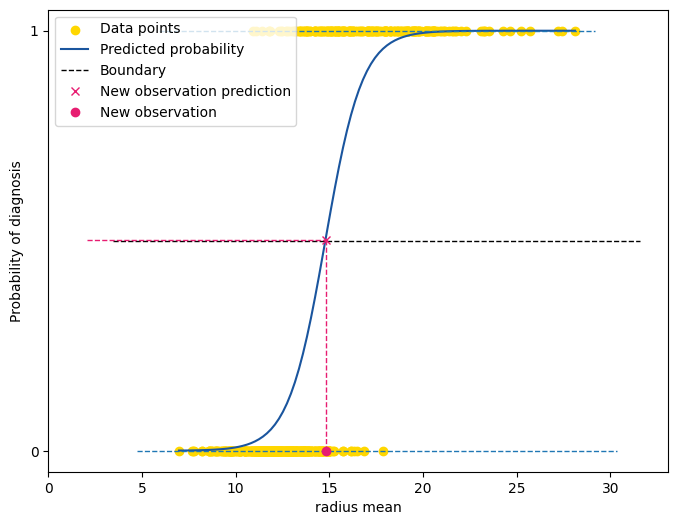

In [89]:
# Plot the graph
plt.figure(figsize=(8, 6))

# Scatter plot and line plot
plt.scatter(x, y, color='gold', label='Data points')
plt.plot(X_space, prob[:, 1], color=color_blue, label='Predicted probability')

# Add horizontal lines upper bound
plt.hlines(1, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
# Add horizontal lines lower bound
plt.hlines(0, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
# Add horizontal lines, the discriminant boundary
plt.hlines(0.5, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1, colors='black', label='Boundary')
# Add new observation
plt.vlines(new_radius_mean, ymin=0, ymax=prob_new_obs, linestyles='dashed', lw=1, colors=color_pink)
plt.hlines(prob_new_obs, xmin=plt.gca().get_xlim()[0], xmax=new_radius_mean, linestyles='dashed', lw=1, colors=color_pink)
plt.plot(new_radius_mean, prob_new_obs, 'gx', label='New observation prediction', color=color_pink)
plt.plot(new_radius_mean, 0, 'go', label='New observation', color=color_pink)


# Set labels and ticks
plt.ylabel('Probability of diagnosis')
plt.xlabel('radius mean')
plt.yticks([0,1])
plt.xlim(xmin=0)

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()

In [90]:
# Look at the parameters
print('classes: ',logistic.classes_)
print('coefficients: ',logistic.coef_)
print('intercept :', logistic.intercept_)

classes:  [0 1]
coefficients:  [[1.00853221]]
intercept : [-14.91581827]


In [91]:
X_train_w_intercept = sm.add_constant(pd.DataFrame(X_train, columns=['radius_mean']))
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary2()# .tables[1]

Optimization terminated successfully.
         Current function value: 0.290017
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.561     
Date:               2025-05-28 13:22 AIC:              267.9150  
No. Observations:   455              BIC:              276.1556  
Df Model:           1                Log-Likelihood:   -131.96   
Df Residuals:       453              LL-Null:          -300.69   
Converged:          1.0000           LLR p-value:      2.2745e-75
No. Iterations:     8.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -15.0560   1.4467 -10.4072 0.0000 -17.8915 -12.2205
radius_mean     1.0184   0.1014  10.0400 0.0000   0.8196   1.2172
=================================================================

"""

# Multiple Logistic Regression

# Mean

In [92]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'diagnosis_enc'],
      dtype='object')

# mean

In [93]:
X = df[['radius_mean', 'concavity_mean','compactness_mean','fractal_dimension_mean','smoothness_mean','texture_mean','perimeter_mean','area_mean','concave points_mean','symmetry_mean']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
y = df['diagnosis_enc']

In [95]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.121015
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.9428,14.543,-0.752,0.452,-39.446,17.560
radius_mean,1.2204,4.111,0.297,0.767,-6.838,9.279
concavity_mean,5.5130,9.708,0.568,0.570,-13.514,24.540
compactness_mean,7.5763,23.553,0.322,0.748,-38.588,53.740
fractal_dimension_mean,-83.6258,103.378,-0.809,0.419,-286.242,118.991
smoothness_mean,79.9334,36.551,2.187,0.029,8.294,151.573
texture_mean,0.4464,0.081,5.494,0.000,0.287,0.606
perimeter_mean,-0.5421,0.578,-0.939,0.348,-1.674,0.590
area_mean,0.0366,0.018,2.005,0.045,0.001,0.072
concave points_mean,93.3472,35.903,2.600,0.009,22.979,163.715


# SE

In [96]:
X = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
y = df['diagnosis_enc']

In [98]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.243584
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.1060,0.701,-4.430,0.000,-4.480,-1.732
radius_se,-26.3281,6.412,-4.106,0.000,-38.895,-13.761
texture_se,-0.3613,0.489,-0.739,0.460,-1.320,0.597
perimeter_se,-0.1609,0.513,-0.313,0.754,-1.167,0.845
area_se,0.3734,0.060,6.206,0.000,0.255,0.491
smoothness_se,-57.2722,112.259,-0.510,0.610,-277.295,162.751
compactness_se,58.2287,31.880,1.826,0.068,-4.255,120.712
concavity_se,-1.6003,13.129,-0.122,0.903,-27.333,24.132
concave points_se,78.1294,74.986,1.042,0.297,-68.841,225.100
symmetry_se,12.5710,32.069,0.392,0.695,-50.283,75.425


# worst

In [99]:
X = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
y = df['diagnosis_enc']

In [101]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.077815
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-23.3684,13.610,-1.717,0.086,-50.043,3.307
radius_worst,-0.8876,1.624,-0.547,0.585,-4.070,2.295
texture_worst,0.3078,0.074,4.170,0.000,0.163,0.452
perimeter_worst,0.0040,0.133,0.030,0.976,-0.257,0.265
area_worst,0.0215,0.016,1.337,0.181,-0.010,0.053
smoothness_worst,51.8382,24.044,2.156,0.031,4.712,98.964
compactness_worst,-5.8432,8.827,-0.662,0.508,-23.143,11.457
concavity_worst,4.5252,3.669,1.233,0.217,-2.666,11.716
concave points_worst,33.5525,18.421,1.821,0.069,-2.551,69.656
symmetry_worst,12.3017,6.502,1.892,0.059,-0.443,25.046


# Prova (significant variables takes by Chatgpt)

In [102]:
X = df[['radius_mean', 'concavity_mean', 'smoothness_mean']]
y = df['diagnosis_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.187346
         Iterations 9


,coef,std err,z,P>|z|,[0.025,0.975]
const,-24.9356,3.087,-8.079,0.000,-30.985,-18.886
radius_mean,1.0884,0.133,8.155,0.000,0.827,1.350
concavity_mean,16.9838,3.608,4.708,0.000,9.913,24.055
smoothness_mean,76.7080,17.236,4.450,0.000,42.926,110.490


# considering all the significant variables

In [104]:
X = df[["texture_mean" , "concave points_mean", "area_se", "radius_se", "texture_worst"]]
y = df['diagnosis_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
X_train_w_intercept = sm.add_constant(X_train)
est = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.101512
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-16.2372,2.581,-6.291,0.000,-21.296,-11.179
texture_mean,-0.2730,0.151,-1.812,0.070,-0.568,0.022
concave points_mean,102.7128,16.728,6.140,0.000,69.927,135.499
area_se,0.3083,0.069,4.439,0.000,0.172,0.444
radius_se,-21.1370,6.207,-3.405,0.001,-33.302,-8.972
texture_worst,0.5220,0.122,4.267,0.000,0.282,0.762


# Confusion matrix table

In [106]:
# Add an intercept to the test dataset
X_test_w_intercept = sm.add_constant(X_test)

# Predict probabilities using the trained model
pred = est.predict(X_test_w_intercept).round(2)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (pred > 0.5).astype(int)

In [107]:
# Print only the first 20 pairs with formatted alignment
print(f"{'Pred Prob':<12} {'Pred Class':<12}")  # Header
print("-" * 25)

for i in range(80, 100):
    print(f"{pred.values[i]:<12} {y_pred.values[i]:<12}")

Pred Prob    Pred Class  
-------------------------
1.0          1           
1.0          1           
0.0          0           
0.0          0           
0.0          0           
0.2          0           
1.0          1           
1.0          1           
1.0          1           
0.0          0           
1.0          1           
0.0          0           
0.69         1           
0.0          0           
0.05         0           
0.0          0           
0.0          0           
0.99         1           
0.0          0           
0.0          0           


In [108]:
print(y_pred.value_counts())

0    72
1    42
Name: count, dtype: int64


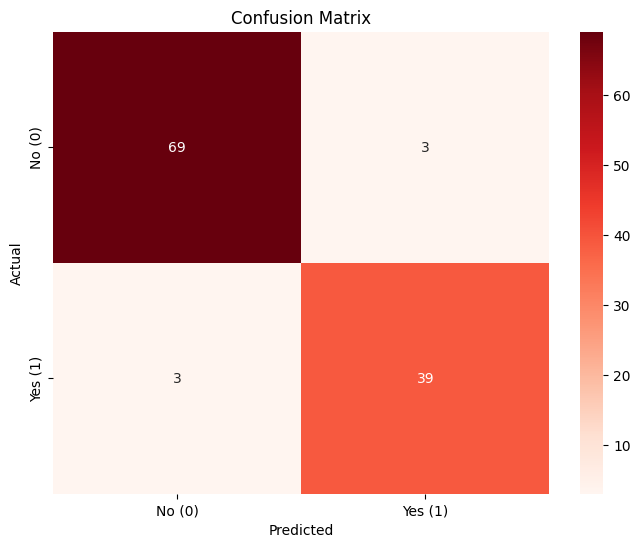

In [109]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Reds',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
# Function to evaluate the performance of a classification model
def evaluate_classification_performance(y_test, y_pred):
    """
    Evaluate and print out standard classification metrics.
    """
    # Compute the confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate specificity = TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # Calculate other metrics using scikit-learn
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # FPR = 1 - specificity
    fpr = 1 - specificity
    
    # Print all metrics in a neat format
    print(f"Accuracy:    {accuracy:.2f}")
    print(f"Precision:   {precision:.2f}")
    print(f"Recall:      {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"FPR:         {fpr:.2f}")
    print(f"F1 Score:    {f1:.2f}")
    
    # Optionally return metrics in a dictionary if needed
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'fpr': fpr,
        'f1_score': f1
    }

In [111]:
metrics_dict = evaluate_classification_performance(y_test, y_pred)

Accuracy:    0.95
Precision:   0.93
Recall:      0.93
Specificity: 0.96
FPR:         0.04
F1 Score:    0.93


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Roc Curve

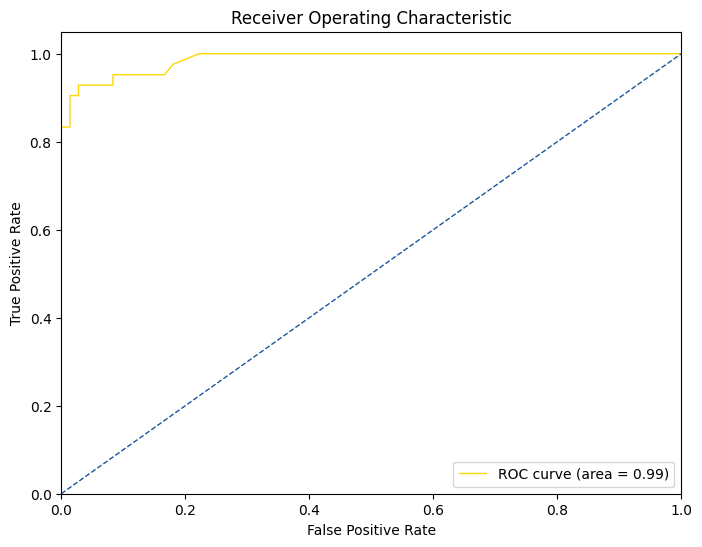

In [113]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gold', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color=color_blue, lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [114]:
# Calculate the Gini coefficient
gini = 2 * roc_auc - 1
print('Gini coefficient: %.2f' % gini)

Gini coefficient: 0.97


# Managing Unbalanced Dataset


Managing datasets effectively is crucial in classification tasks for several reasons:

1. **Class Imbalance**: In many real-world scenarios, datasets are imbalanced, meaning some classes are underrepresented compared to others. This can lead to biased models that perform well on the majority class but poorly on the minority class. Techniques like oversampling, undersampling, and SMOTE (Synthetic Minority Over-sampling Technique) help address this issue by balancing the class distribution.

2. **Model Performance**: Proper dataset management ensures that the model is trained on representative data, leading to better generalization and performance on unseen data. This includes splitting the data into training and test sets, and sometimes a validation set, to evaluate the model's performance accurately.

3. **Data Quality**: Cleaning and preprocessing the data, such as handling missing values, removing duplicates, and normalizing features, are essential steps to ensure the quality of the dataset. High-quality data leads to more reliable and accurate models.

4. **Bias and Variance Trade-off**: Managing the dataset helps in achieving a balance between bias and variance. Properly splitting the data and using techniques like cross-validation can help in finding the right model complexity that generalizes well to new data.

5. **Feature Engineering**: Creating new features or transforming existing ones can significantly impact the model's performance. Effective dataset management includes feature selection and engineering to enhance the model's predictive power.

In summary, managing datasets is a fundamental aspect of building robust and reliable classification models. It ensures that the model is trained on balanced, high-quality data, leading to better performance and generalization.

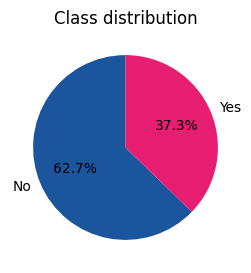

In [115]:
plt.figure(figsize=(4, 3))
plt.pie(df['diagnosis'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=[color_blue, color_pink])
plt.title('Class distribution')
plt.show()

## SMOTE

<b>SMOTE</b> (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in datasets. It works by generating synthetic samples for the minority class to balance the class distribution. Here’s a brief explanation:

1. **Identify Minority Class**: SMOTE identifies the minority class in the dataset.
2. **Generate Synthetic Samples**: For each sample in the minority class, SMOTE selects one or more of its nearest neighbors and generates new synthetic samples along the line segments joining the sample and its neighbors.
3. **Balance the Dataset**: The synthetic samples are added to the dataset, increasing the representation of the minority class and balancing the class distribution.

SMOTE helps improve the performance of machine learning models by providing a more balanced dataset, which reduces the bias towards the majority class.

In [116]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
from imblearn.over_sampling import SMOTE

Our goal is to create synthetic variables using <b>SMOTE</b> and use them <b>ONLY IN THE TRAINING SET</b>, as these should never be used in the test set.

Based on how much we want to oversample the minority class, we will decide how many variables from the majority class to include.

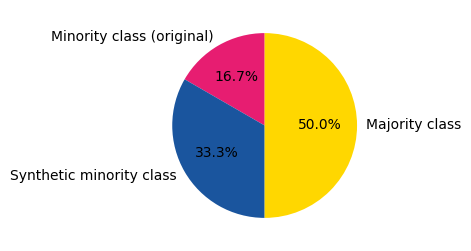

In [118]:
# Define the number of original minority class observations in the training set
obs_minority_train = 10

# Define the oversampling ratio
oversampling_ratio = 3

# Calculate the number of synthetic minority class observations
obs_syntetic_minority = obs_minority_train * (oversampling_ratio - 1)

# Calculate the number of majority class observations in the training set
obs_majority_train = obs_syntetic_minority + obs_minority_train

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie([obs_minority_train, obs_syntetic_minority, obs_majority_train],
        labels=['Minority class (original)', 'Synthetic minority class', 'Majority class'],
        autopct='%1.1f%%',
        startangle=90,
        colors=[color_pink, color_blue, 'gold'])
plt.show()

In [119]:
# Choose the variables to use
data = df[["texture_mean" , "concave points_mean", "area_se", "radius_se", "texture_worst","diagnosis_enc"]]

In [120]:
# 1. Split into train and test sets, stratifying by y
train, test = train_test_split(data, test_size=0.2, stratify=y, random_state=42)

In [121]:
print("----- TEST -----")
print(test.value_counts('diagnosis_enc'))

print("\n----- TRAIN -----")
print(train.value_counts('diagnosis_enc'))

----- TEST -----
diagnosis_enc
0    72
1    42
Name: count, dtype: int64

----- TRAIN -----
diagnosis_enc
0    285
1    170
Name: count, dtype: int64


In [122]:
train.head()

,texture_mean,concave points_mean,area_se,radius_se,texture_worst,diagnosis_enc
10,23.24,0.03323,40.51,0.3795,33.88,1
170,12.39,0.03700,17.43,0.2360,15.64,0
407,21.37,0.01867,41.24,0.4993,27.01,0
430,22.53,0.09711,24.19,0.2530,27.57,1
27,20.25,0.07731,93.54,0.8529,27.26,1


In [123]:
# 2. Exclude observations in the test set from the original dataset
data_no_test = data.drop(train.index)

In [124]:
# 3. Compute the maximum possible oversampling ratio (MAX)
n_majority = (data_no_test['diagnosis_enc'] == 0).sum()
n_minority = (data_no_test['diagnosis_enc'] == 1).sum()
max_ratio = n_majority / n_minority  # Maximum possible ratio

print(f"X_majority (NO): {n_majority}")
print(f"X_minority (YES): {n_minority}")
print(f"Maximum oversampling ratio (on original majority): {max_ratio:.2f}")

X_majority (NO): 72
X_minority (YES): 42
Maximum oversampling ratio (on original majority): 1.71


In [125]:
# 4. Select a ratio lower than MAX
selected_ratio = 3.0 
selected_ratio = min(selected_ratio, max_ratio)  # Example: choose 3.0 or less if max_ratio < 3.0

print(f"Selected oversampling ratio: {selected_ratio:.2f}")

Selected oversampling ratio: 1.71


In [126]:
# 5. Compute the number of majority class observations to sample
n_majority_sample = int(n_minority * selected_ratio)

print(f"Number of majority class observations to sample: {n_majority_sample}")

Number of majority class observations to sample: 72


In [127]:
# 6. Sample the majority class
majority_sampled_df = data_no_test[data_no_test['diagnosis_enc'] == 0].sample(n=n_majority_sample, random_state=42)

In [128]:
# 7. Extract the minority class and merge with sampled majority class observations
minority_df = data_no_test[data_no_test['diagnosis_enc'] == 1]

In [129]:
# 8. Concatenate the sampled majority class (reduced) and the minority class (full)
unbalanced_df = pd.concat([majority_sampled_df, minority_df])

In [130]:
# NOTE: the dataset is still unbalanced
print(unbalanced_df.value_counts('diagnosis_enc'))

diagnosis_enc
0    72
1    42
Name: count, dtype: int64


At this point, the dataset is still imbalanced, but we have selected a number of observations from the majority class that respects the ratio we decided to use for oversampling.

This means that we have reduced the number of majority class samples to match the oversampling ratio, but the dataset has not yet been balanced using SMOTE or other techniques.

In [131]:
# 8. Apply SMOTE to balance the minority class to the majority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(unbalanced_df.drop(columns=['diagnosis_enc']), unbalanced_df['diagnosis_enc'])


In [132]:
print(y_train_resampled.value_counts())

diagnosis_enc
0    72
1    72
Name: count, dtype: int64


## SMOTE: Plot the Datasets' Composition

In [133]:
# Calculate the number of observations excluded from the majority class
excluded_majority = n_majority - n_majority_sample

# Calculate the number of synthetic observations in the train set for minority
n_min_SMOTE = len(y_train_resampled) - len(unbalanced_df)

# Retrieve the number of observations in the test set for the majority class
n_majority_test = len(test[test['diagnosis_enc'] == 0])

# Retrieve the number of observations in the test set for the minority class
n_minority_test = len(test[test['diagnosis_enc'] == 1])

In [134]:
# Define dataset composition using structured dictionary
composition_data = {

    # Observations sampled for TRAIN from the MAJ_ority
    "MAJ_sampled_train": {"size": n_majority_sample,
                          "label": "MAJ (Train)",
                          "color": "#D9A673"},

    # Observations sampled for TEST from the MAJ_ority
    "MAJ_test": {"size": n_majority_test,
                 "label": "MAJ (Test)",
                 "color": "#C98B5D"},

    # Observations EXCLUDED from TRAIN the MAJ_ority
    "MAJ_excluded_train": {"size": excluded_majority,
                           "label": "MAJ Excluded",
                           "color": "#E8C1A0"},

    # Observations sampled for TRAIN from the min_ority
    "min_train": {"size": n_minority,
                  "label": "min (Train)",
                  "color": "#A3C1DA"},
    
     # Observations sampled for TEST from the min_ority
    "min_test": {"size": n_minority_test,
                 "label": "min (Test)",
                 "color": "#85A6BF"},

    # Observations generated by SMOTE for TRAIN from the min_ority
    "min_SMOTE_train": {"size": n_min_SMOTE,
                        "label": "min SMOTE (Train)",
                        "color": "#D4EAF7"}
}

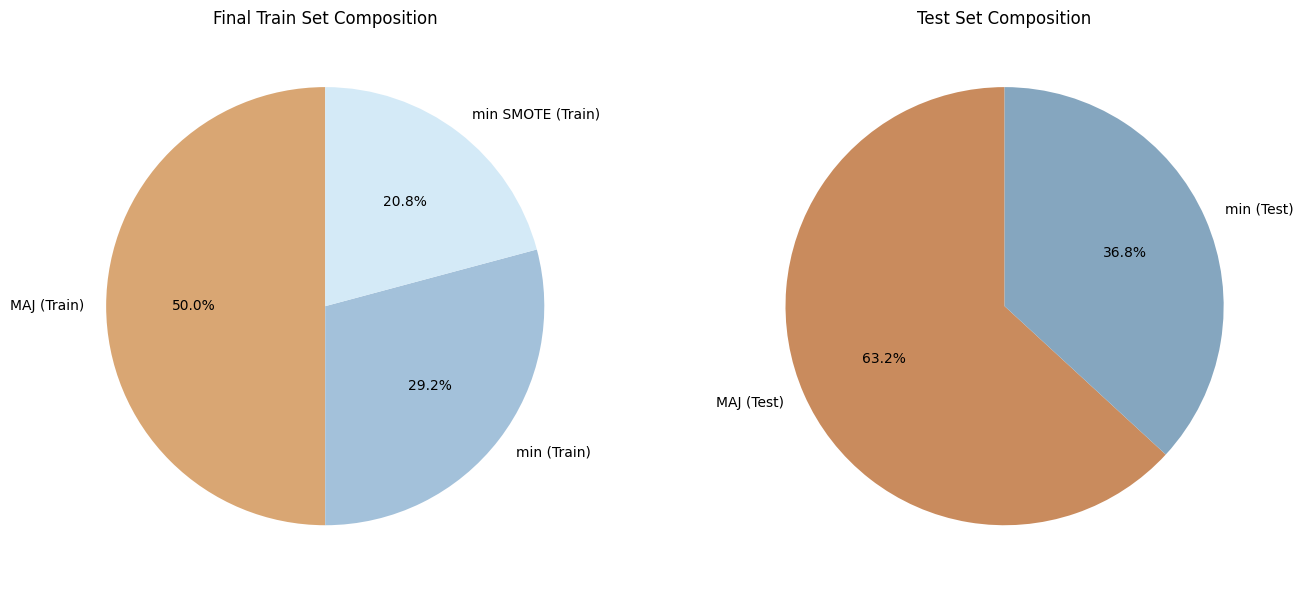

In [135]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart 1: Final Train Set Composition
train_keys = ["MAJ_sampled_train", "min_train", "min_SMOTE_train"]
axes[0].pie(
    [composition_data[k]["size"] for k in train_keys],
    labels=[composition_data[k]["label"] for k in train_keys],
    autopct='%1.1f%%',
    colors=[composition_data[k]["color"] for k in train_keys],
    startangle=90
)
axes[0].set_title("Final Train Set Composition")

# Pie Chart 2: Test Set Composition
test_keys = ["MAJ_test", "min_test"]
axes[1].pie(
    [composition_data[k]["size"] for k in test_keys],
    labels=[composition_data[k]["label"] for k in test_keys],
    autopct='%1.1f%%',
    colors=[composition_data[k]["color"] for k in test_keys],
    startangle=90
)
axes[1].set_title("Test Set Composition")

plt.tight_layout()
plt.show()

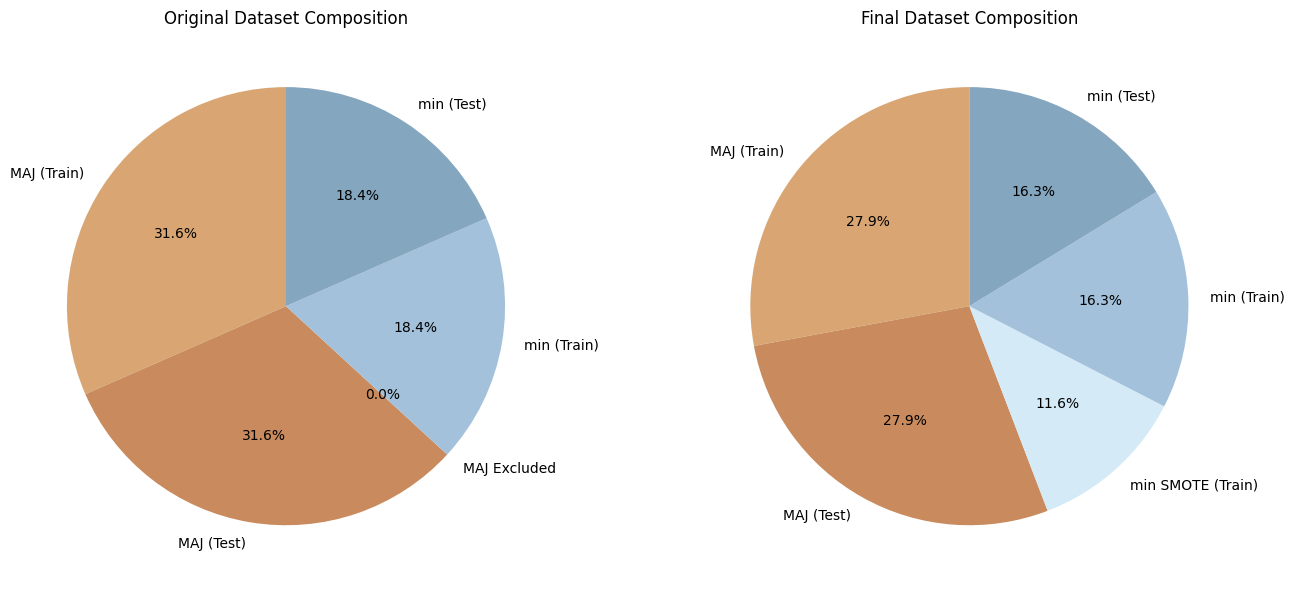

In [136]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart 1: Original Dataset Composition
train_keys = ["MAJ_sampled_train", "MAJ_test","MAJ_excluded_train", "min_train", "min_test"]
axes[0].pie(
    [composition_data[k]["size"] for k in train_keys],
    labels=[composition_data[k]["label"] for k in train_keys],
    autopct='%1.1f%%',
    colors=[composition_data[k]["color"] for k in train_keys],
    startangle=90
)
axes[0].set_title("Original Dataset Composition")

# Pie Chart 2: Test Set Composition
test_keys = ["MAJ_sampled_train", "MAJ_test", "min_SMOTE_train", "min_train", "min_test"]
axes[1].pie(
    [composition_data[k]["size"] for k in test_keys],
    labels=[composition_data[k]["label"] for k in test_keys],
    autopct='%1.1f%%',
    colors=[composition_data[k]["color"] for k in test_keys],
    startangle=90
)
axes[1].set_title("Final Dataset Composition")

plt.tight_layout()
plt.show()

KeyError: 'diagnosis_enc'

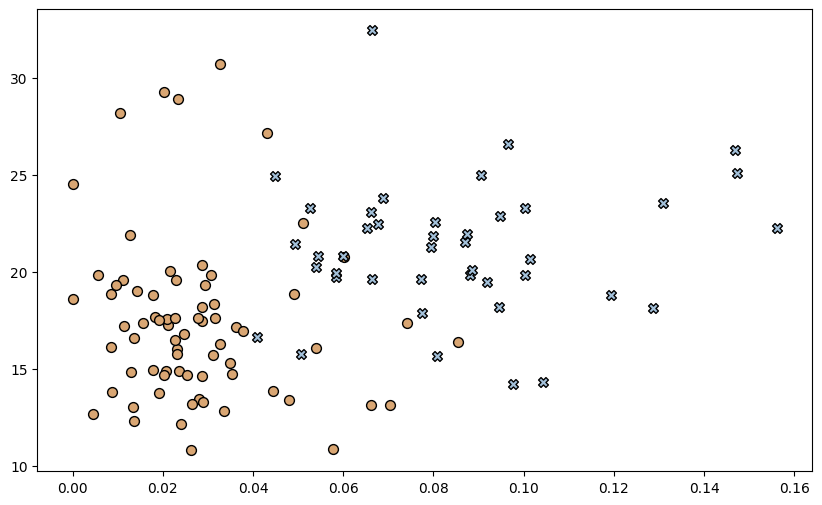

In [163]:
# Extract relevant data for scatter plot
scatter_data = {
    "MAJ_sampled_train": {"df": majority_sampled_df, "color": "#D9A673", "label": "MAJ Sampled (Train)"},
    "min_train": {"df": minority_df, "color": "#A3C1DA", "label": "min (Train)"},
    "min_SMOTE_train": {"df": X_train_resampled.iloc[len(unbalanced_df):].assign(default_enc=1), "color": "darkred", "label": "min SMOTE (Train)"}
}

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for key, values in scatter_data.items():
    df_subset = values["df"]
    markers = df_subset["diagnosis_enc"].apply(lambda x: 'X' if x == 1 else 'o')
    
    for marker in markers.unique():
        df_marker = df_subset[markers == marker]
        ax.scatter(df_marker["concave points_mean"], df_marker["texture_mean"], 
                   label=f"{values['label']} ({'M' if marker == 'X' else 'B'})", 
                   color=values["color"], marker=marker, alpha=1, edgecolors='k', s=50)

ax.set_xlabel("texture_mean")
ax.set_ylabel("diagnosis_enc")
ax.set_title("Scatter Plot of Train Data")
ax.legend()
plt.show()

# Decision_tree

In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [143]:
#Import the dataset
df = pd.read_csv("https://raw.githubusercontent.com/PareshC95/Breast_cancer_classification/refs/heads/main/data.csv")

In [144]:
#encode the values of diagnosis B and M to 0 and 1
df["diagnosis_enc"] = df["diagnosis"].map({'B': 0, 'M': 1})
df["diagnosis_enc"].value_counts()

diagnosis_enc
0    357
1    212
Name: count, dtype: int64

In [145]:
df = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [146]:
X = df.drop('diagnosis_enc', axis=1)
y = df['diagnosis_enc']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Model definition
model = DecisionTreeClassifier(random_state=42)

# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
# Previsione sui dati di test
y_pred = model.predict(X_test)

# Calcolo della precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


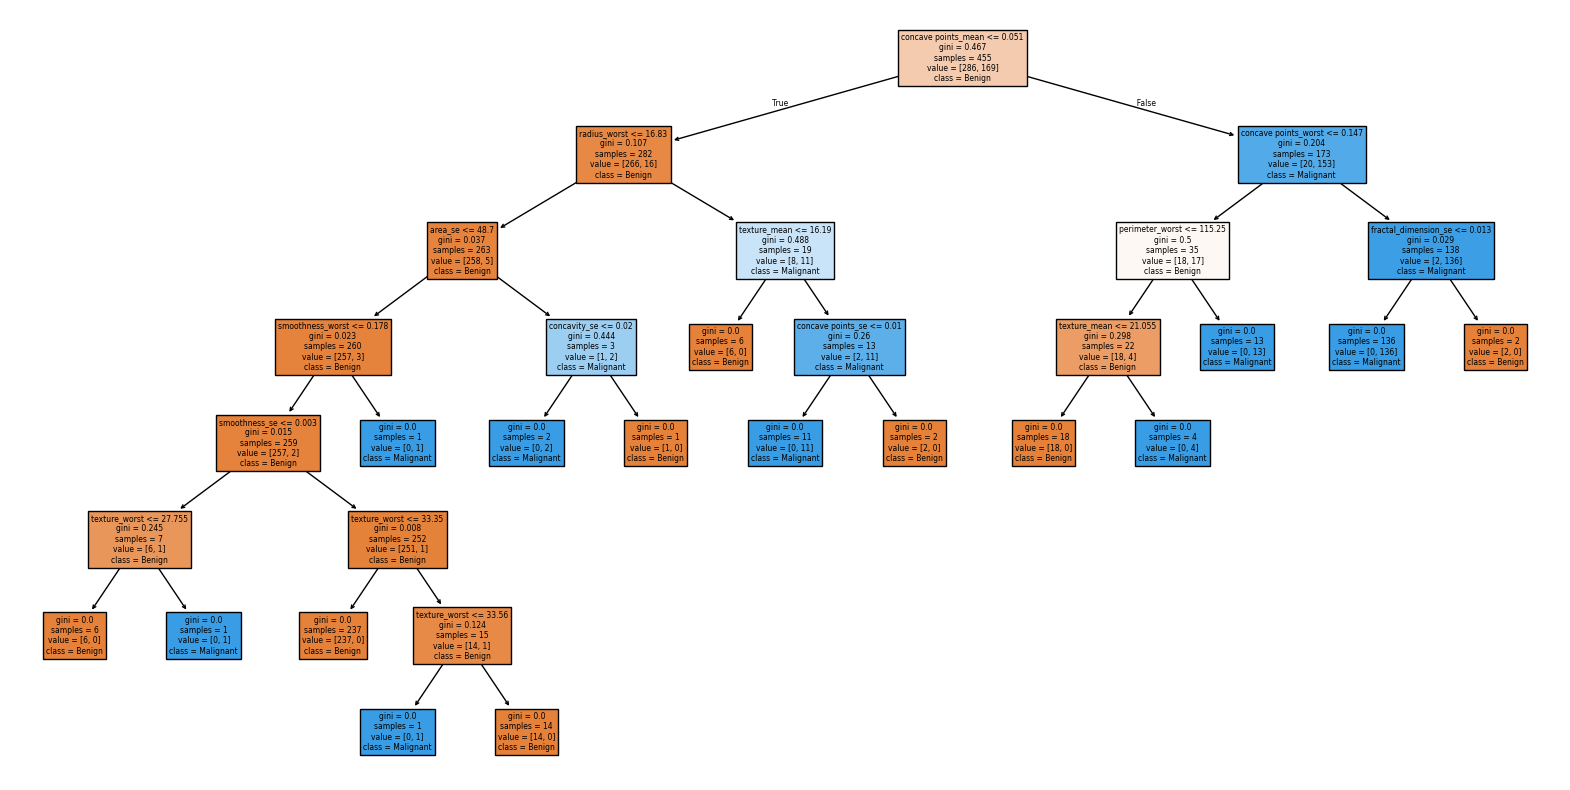

In [151]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()

In [152]:
# Model creation with pre-pruning
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')


Accuracy after pruning: 0.95


C:\Users\pchaudhary.FFIND\AppData\Local\Temp\ipykernel_1052\1525806876.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


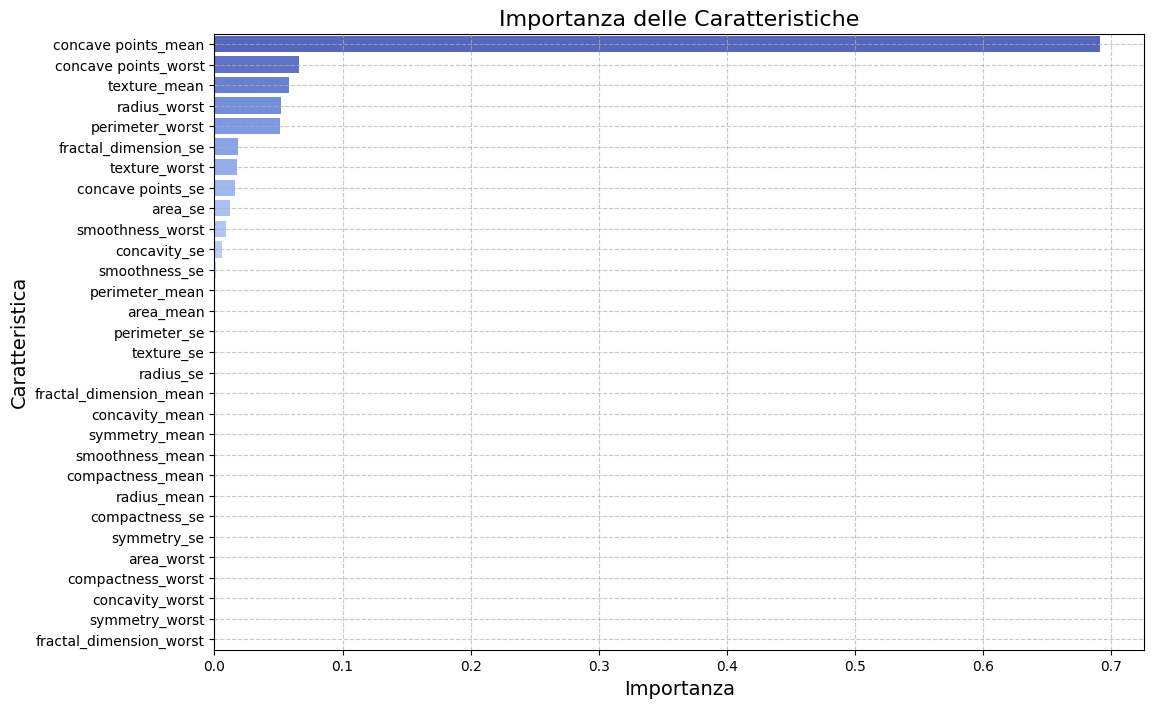

In [158]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Pre-pruning

In [ ]:
# Model with pre-pruning
# min_samples_split: The minimum number of samples required to split an internal node
model_pre_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.95


# post-pruning

In [ ]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Find the best alpha
model_pruned = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        model_pruned = model_temp

print(f'Best accuracy after post-pruning: {best_accuracy:.2f}')

Best accuracy after post-pruning: 0.96


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation with cross validation setted to 5
scores = cross_val_score(model_pruned, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.92105263 0.89473684 0.92982456 0.94736842 0.90265487]
Mean accuracy: 0.92


### Cross validation and post-pruning

In [ ]:
best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp

print(f'Best cross-validated accuracy: {best_score:.2f}')

Best cross-validated accuracy: 0.93


In [ ]:
best_model = None
best_score = 0
best_alpha = None

for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = ccp_alpha

print(f'Best cross-validated accuracy: {best_score:.2f}')

# Fit best model with selected alpha
best_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_model.fit(X_train, y_train)

Best cross-validated accuracy: 0.93


DecisionTreeClassifier(ccp_alpha=np.float64(0.008663799968147794),
                       random_state=42)

In [162]:
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

NameError: name 'best_model' is not defined

In [ ]:
# Best model training
best_model.fit(X_train, y_train)

# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.96


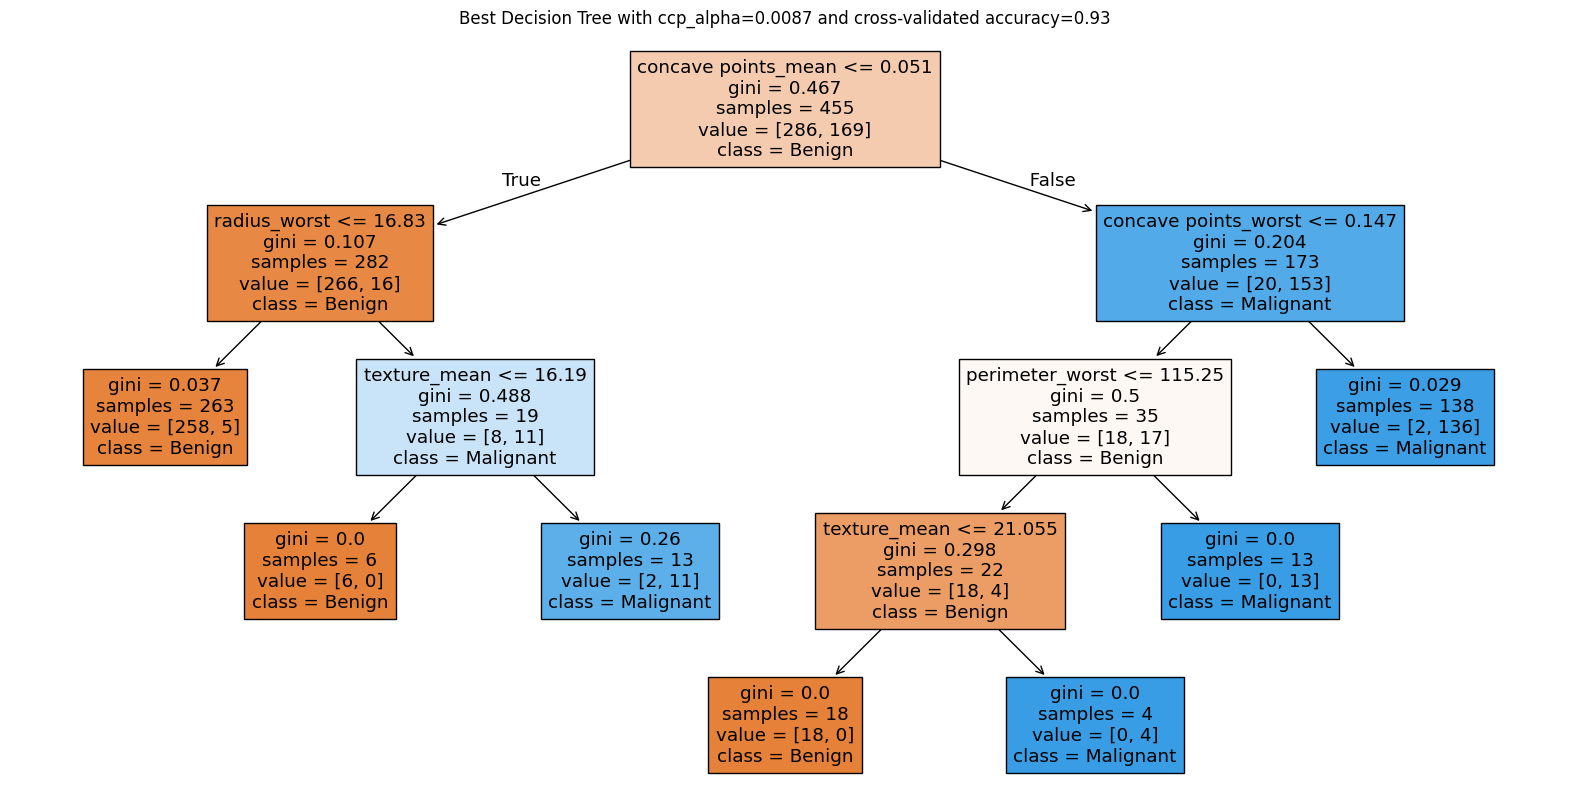

In [ ]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={best_model.ccp_alpha:.4f} and cross-validated accuracy={best_score:.2f}')
plt.show()

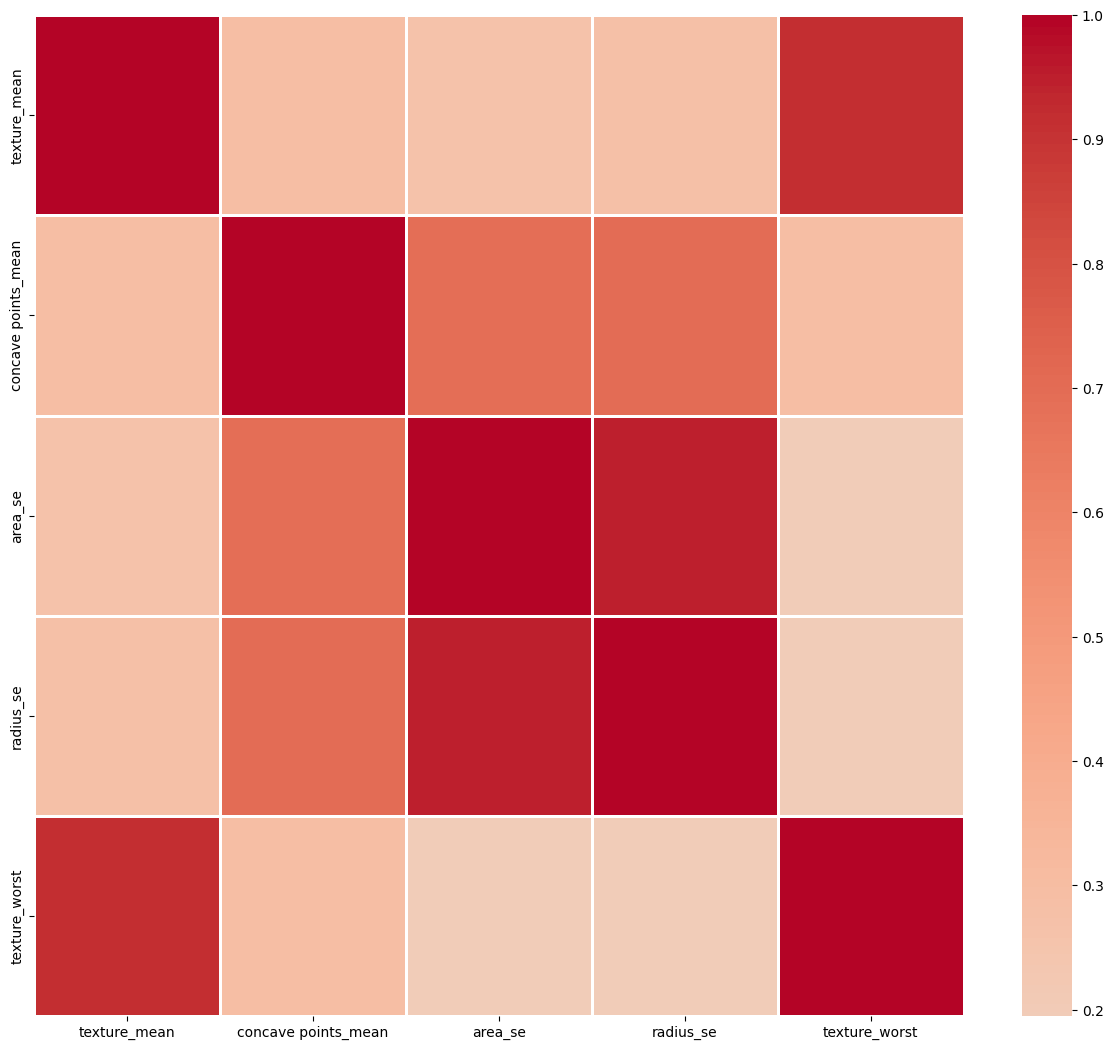

In [ ]:
corr = X.corr()

plt.figure(figsize=(15, 13))
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            # annot=True,
            # fmt=".2f",
            linecolor='white',
            linewidths=1
            )
plt.show()

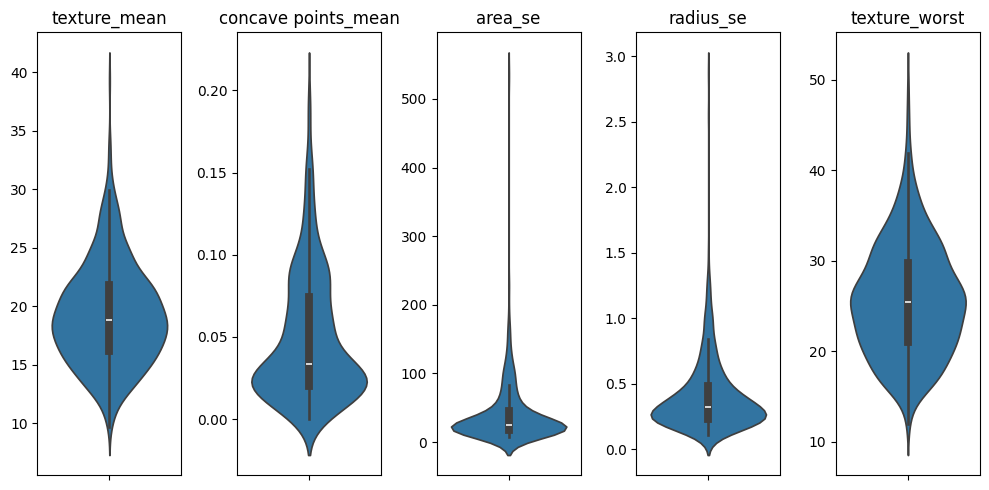

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.violinplot(y=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# correlation ()

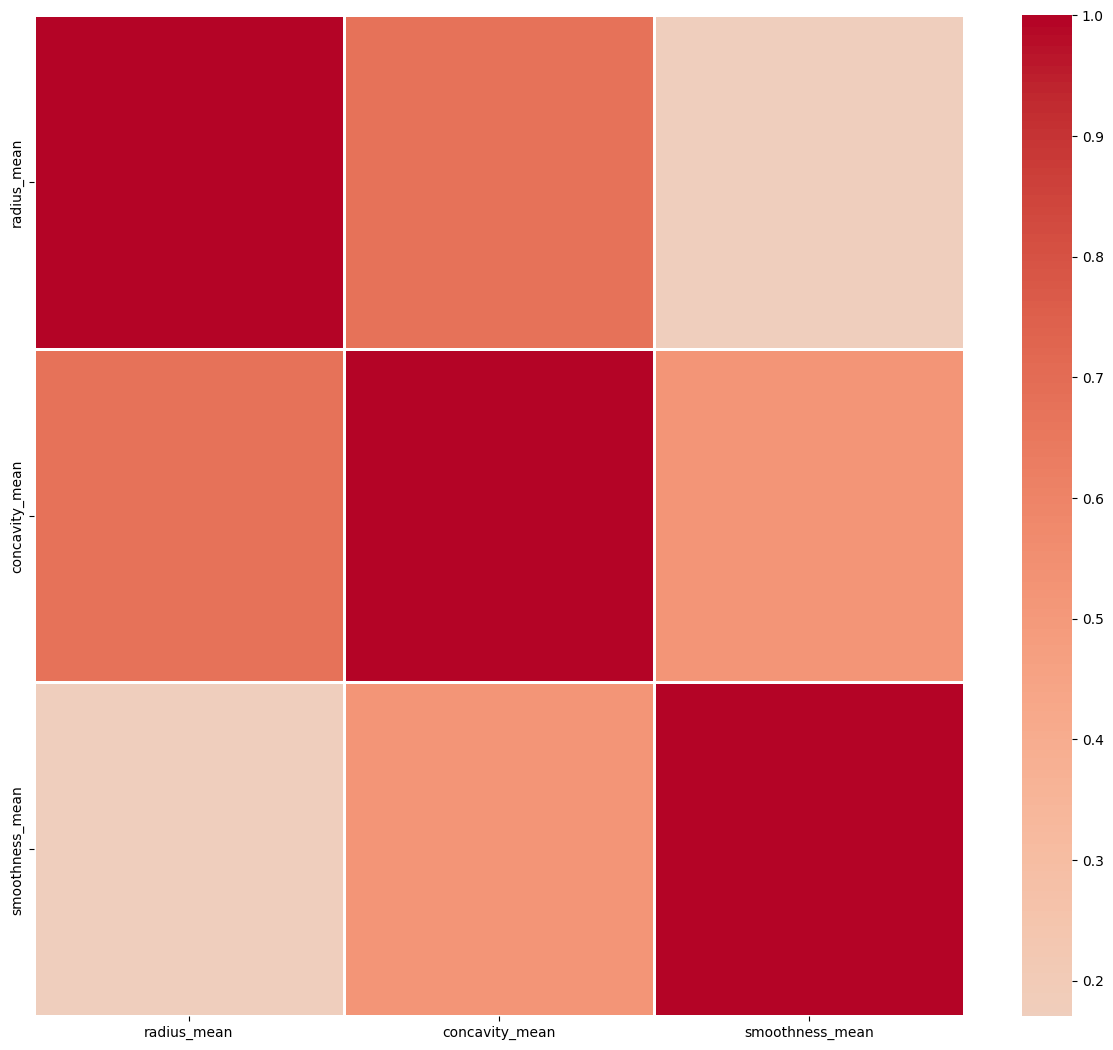

In [ ]:
corr = X.corr()

plt.figure(figsize=(15, 13))
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            # annot=True,
            # fmt=".2f",
            linecolor='white',
            linewidths=1
            )
plt.show()

In [ ]:
corr = df_prova.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            # annot=True,
            # fmt=".2f",
            linecolor='white',
            linewidths=1
            )
plt.show()

NameError: name 'df_prova' is not defined

IndexError: index 30 is out of bounds for axis 0 with size 30

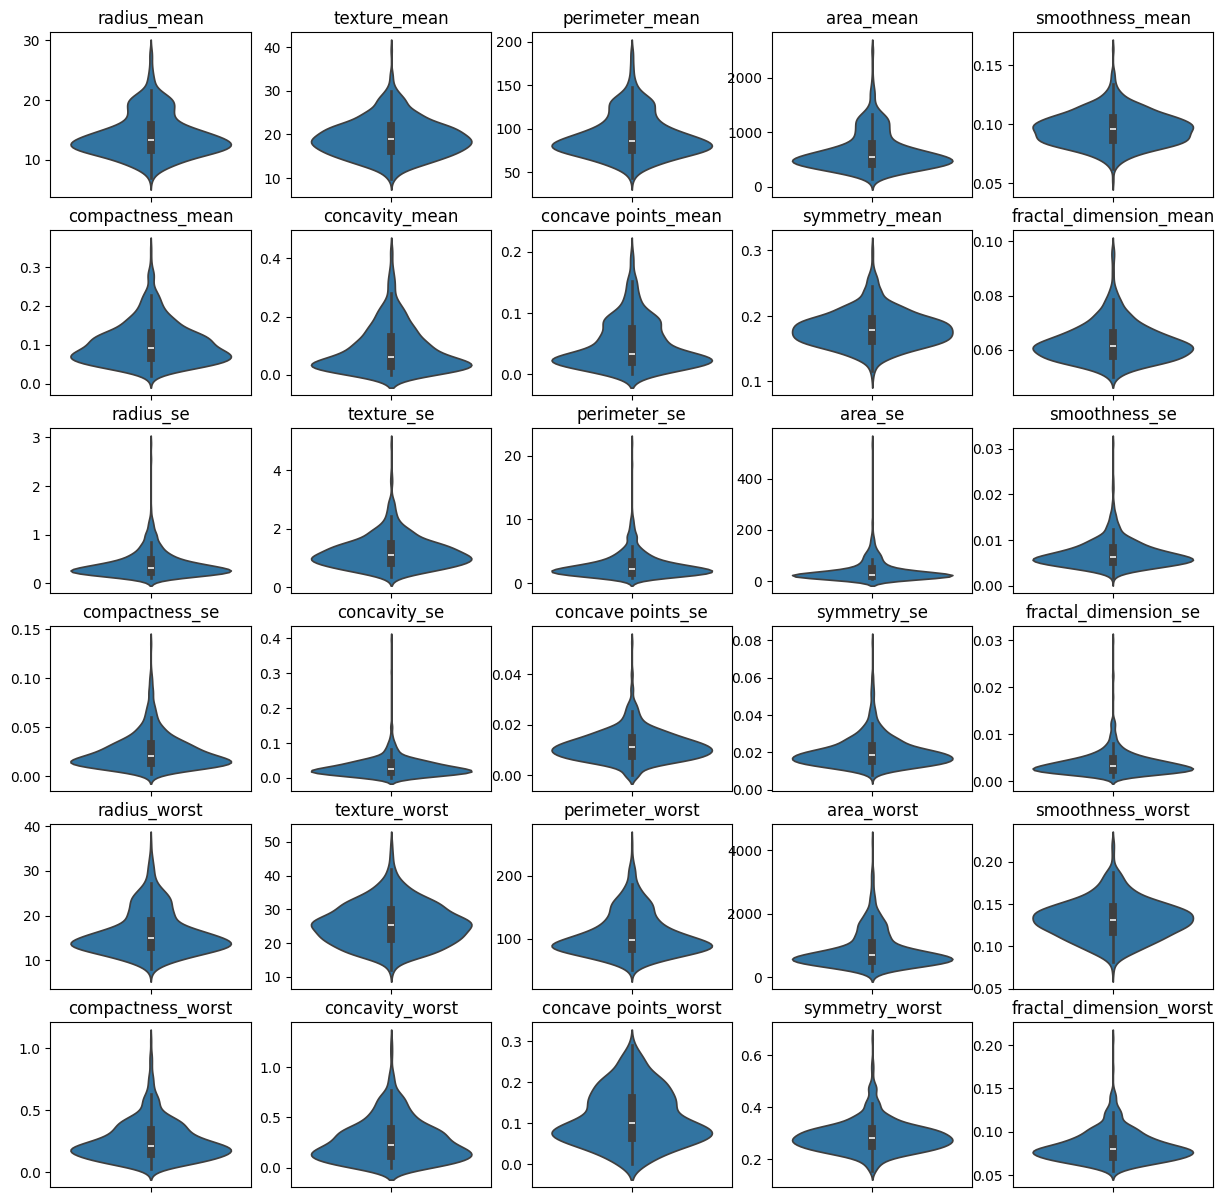

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.violinplot(y=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
X = X.drop(columns=["radius_mean", "perimeter_mean", "perimeter_mean", "perimeter_worst","area_worst","radius_se","perimeter_se"])

# Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [ ]:
# Fit the model

logistic = skl_lm.LogisticRegression()

logistic.fit(X_train, y_train)

c:\Users\pchaudhary.FFIND\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Outlier Detection

In [ ]:
color_blue = "#1a559e"
color_black_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

In [ ]:
col_to_analyze = "area_se"

In [ ]:
q1, q2, q3 = np.percentile(X[col_to_analyze], [25, 50, 75])
bins = 80
data = X[col_to_analyze]
q1, q2, q3 = np.percentile(data, [25, 50, 75])

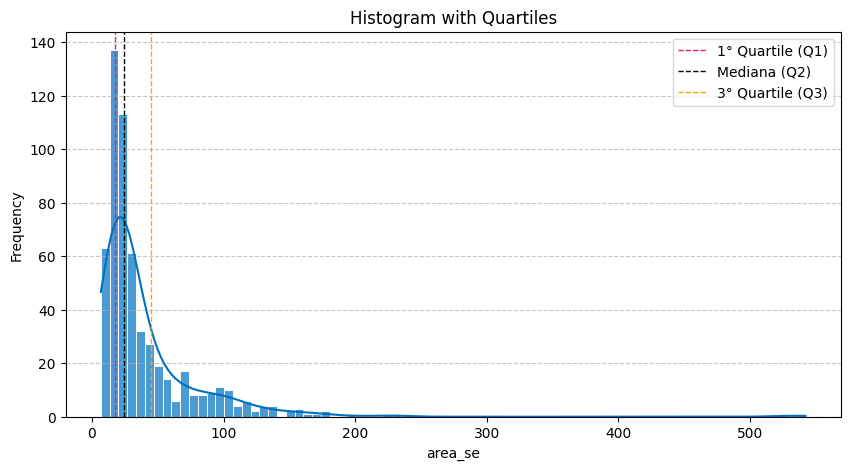

In [ ]:
# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [ ]:
mean = X[col_to_analyze].mean()
std = X[col_to_analyze].std()
threshold = 2

computed_threshold = threshold * std
computed_threshold_right = mean + computed_threshold 
computed_threshold_left = mean - computed_threshold

standard_deviation_outliers = np.abs(X[col_to_analyze] - mean) > computed_threshold

print(f"Number of outliers: {standard_deviation_outliers.sum()}")
print(f"Percentage of outliers: {standard_deviation_outliers.mean() * 100:.2f}%")

Number of outliers: 19
Percentage of outliers: 3.34%


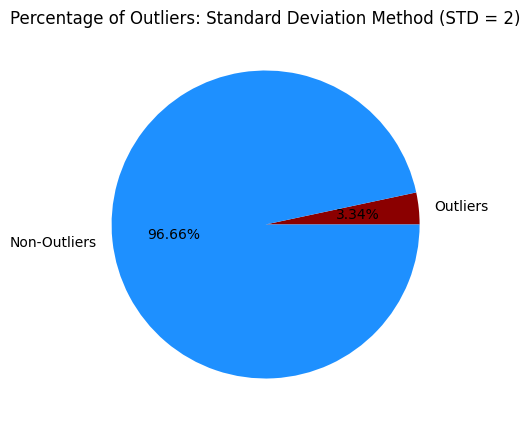

In [ ]:
# plot a piechart for percentage exclusion
plt.figure(figsize=(5, 5))
plt.pie([standard_deviation_outliers.mean(), 1 - standard_deviation_outliers.mean()],
        labels=["Outliers", "Non-Outliers"],
        autopct='%1.2f%%',
        colors=[color_red, color_blue_light ])
plt.title(f"Percentage of Outliers: Standard Deviation Method (STD = {threshold})")
plt.show()

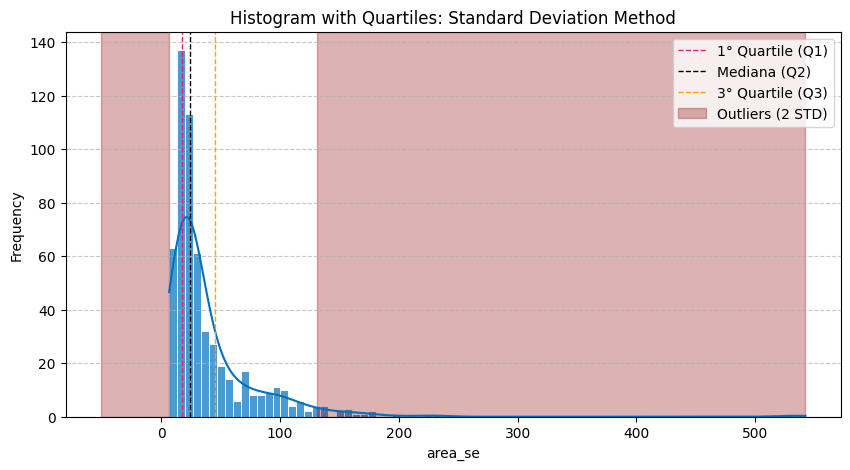

In [ ]:
# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed thresholds
outliers_label = f"Outliers ({threshold} STD)"
plt.axvspan(computed_threshold_right, data.max(), color=color_red, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left, color=color_red, alpha=0.3)

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Standard Deviation Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## 2. Box Plot Method (IQR)

The **Box Plot Method** for outlier detection is based on the **Interquartile Range (IQR)**.
This method identifies outliers by calculating the range within which the central 50% of the data lies. Here's how it works:

1. **Calculate Quartiles**: Determine the **first quartile (Q1)** and **third quartile (Q3)** of the data.
2. **Compute IQR**: Calculate the **IQR** as the difference between Q3 and Q1 (**IQR = Q3 - Q1**).
3. **Determine Boundaries**: Define the **lower boundary** as **Q1 - 1.5 * IQR** and the **upper boundary** as **Q3 + 1.5 * IQR**.
4. **Identify Outliers**: Data points that fall **below the lower boundary** or **above the upper boundary** are considered **outliers**.

**When It's Convenient**:
- **Non-Normal Distributions**: Effective for data that is **not normally distributed**.
- **Skewed Data**: Useful for detecting outliers in **skewed datasets**.
- **Robustness**: Less affected by **extreme values** compared to methods based on mean and standard deviation.

This method is particularly useful when dealing with **asymmetric data** or when the data contains **extreme values** that could distort the results of other outlier detection methods.


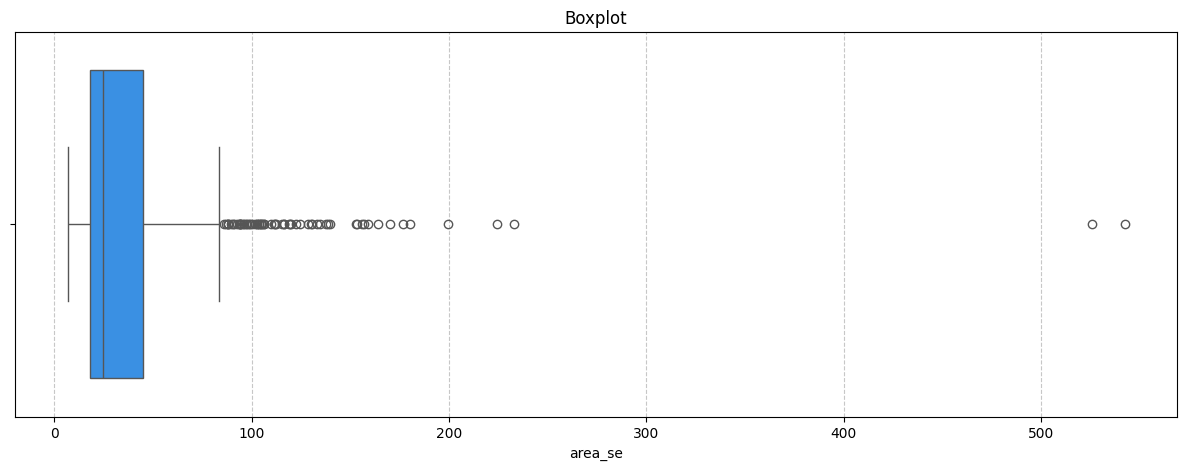

In [ ]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x=data, color=color_blue_light)
plt.title("Boxplot")
plt.xlabel(col_to_analyze)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

box_plot_outliers = (data < lower_bound) | (data > upper_bound)

# Outliers
print(f"Number of outliers: {box_plot_outliers.sum()}")
print(f"Percentage of outliers: {box_plot_outliers.mean() * 100:.2f}%")

Number of outliers: 65
Percentage of outliers: 11.42%


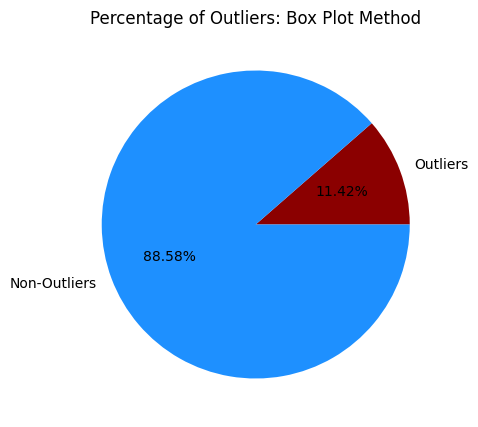

In [ ]:
# plot a piechart for percentage exclusion
plt.figure(figsize=(5, 5))
plt.pie([box_plot_outliers.mean(), 1 - box_plot_outliers.mean()],
        labels=["Outliers", "Non-Outliers"],
        autopct='%1.2f%%',
        colors=[color_red, color_blue_light ])
plt.title("Percentage of Outliers: Box Plot Method")
plt.show()

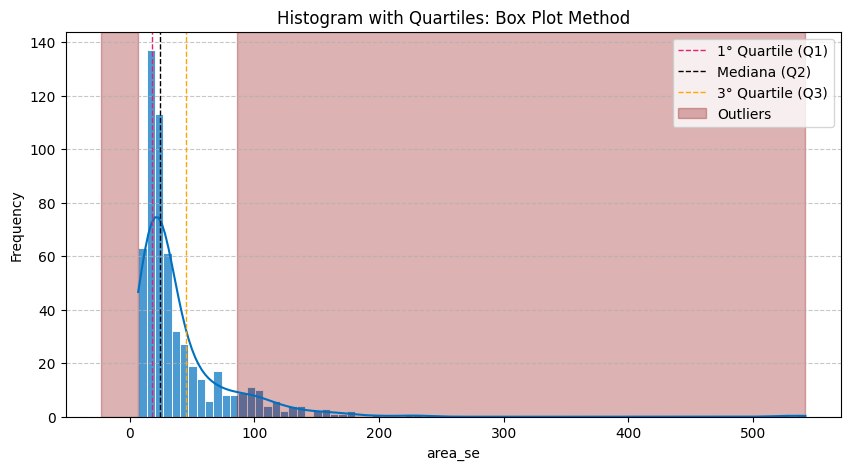

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed thresholds
plt.axvspan(upper_bound, data.max(), color=color_red, alpha=0.3, label="Outliers")
plt.axvspan(data.min(), lower_bound, color=color_red, alpha=0.3)

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Box Plot Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

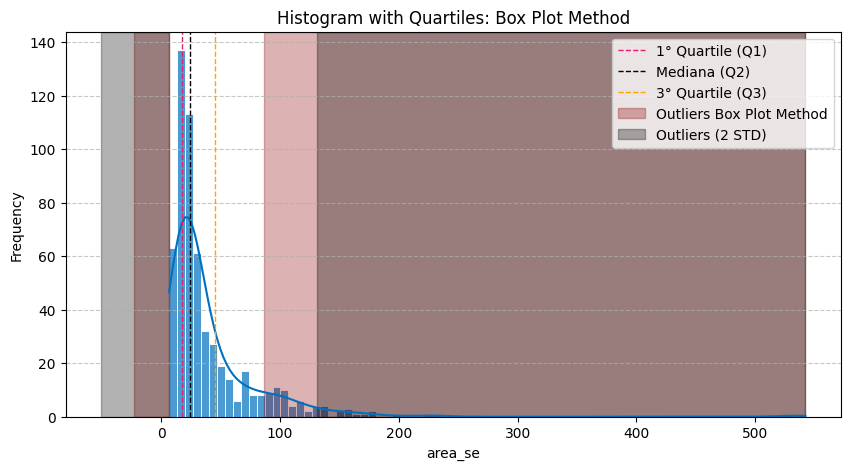

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed by box plot thresholds
plt.axvspan(upper_bound, data.max(), color=color_red, alpha=0.3, label="Outliers Box Plot Method")
plt.axvspan(data.min(), lower_bound, color=color_red, alpha=0.3)

# Color the area beyond the computed by standard deviation thresholds
plt.axvspan(computed_threshold_right, data.max(), color=color_black, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left, color=color_black, alpha=0.3)


# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Box Plot Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

ISOLATION FOREST

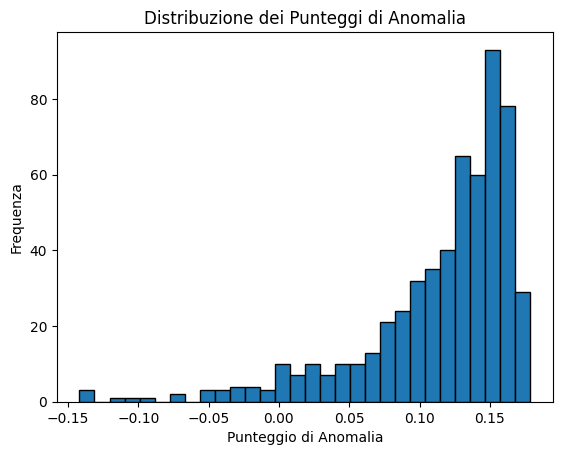

In [ ]:
from sklearn.ensemble import IsolationForest

# Inizializziamo il modello con contamination fissato
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predizione: -1 = anomalia, 1 = normale
y_pred = model.predict(X)

model_auto = IsolationForest(contamination="auto", random_state=42)
model_auto.fit(X)

# Predizione
y_pred_auto = model_auto.predict(X)


import numpy as np

# Calcoliamo i punteggi di anomalia (valori negativi indicano outlier)
scores = model.decision_function(X)

# Visualizziamo la distribuzione dei punteggi
import matplotlib.pyplot as plt
plt.hist(scores, bins=30, edgecolor='black')
plt.xlabel("Punteggio di Anomalia")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi di Anomalia")
plt.show()

# Scegliamo una soglia basata su percentili
threshold = np.percentile(scores, 5)  # Soglia basata sul 5° percentile
anomalies = X[scores < threshold]

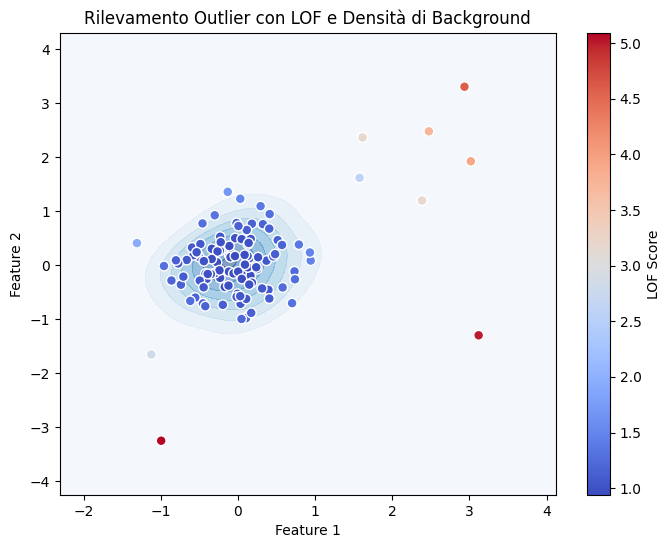

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import gaussian_kde

# Generazione di dati con alcuni outlier
np.random.seed(42)
X_inlier = 0.5 * np.random.randn(100, 2)
X_outlier = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack((X_inlier, X_outlier))

# Applicazione del Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Calcolo della densità dei punti per lo sfondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

# Stima della densità con Kernel Density Estimation (KDE)
kde = gaussian_kde(X.T)
density = kde(np.vstack([xx.ravel(), yy.ravel()]))
density = density.reshape(xx.shape)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, density, cmap="Blues", alpha=0.5)  # Sfondo con densità
plt.scatter(X[:, 0], X[:, 1], c=lof_scores, cmap="coolwarm", edgecolors="white", s=50)
plt.colorbar(label="LOF Score")
plt.title("Rilevamento Outlier con LOF e Densità di Background")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
